In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.metrics import geometric_mean_score
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score, roc_curve, RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dataset = pd.read_csv('/content/drive/MyDrive/AiDataset/traink1.csv')
test_dataset= pd.read_csv('/content/drive/MyDrive/AiDataset/testk1.csv')

In [ ]:
train_dataset

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,1
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,1
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,1
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,986,2.2,5,38,0.3,95,7,9,5,1359,...,15,13,12,1,1,1,1,1,0,1
2794,848,1.1,7,39,0.4,107,4,16,1768,1812,...,18,4,16,1,1,0,1,0,0,0
2795,1146,0.5,4,21,0.5,152,7,6,841,994,...,15,2,19,1,1,0,1,0,0,0
2796,841,0.5,0,59,0.2,103,6,16,258,1642,...,8,6,10,0,0,0,0,1,0,1


In [ ]:
train_dataset.columns

Index(['Battery_Power', 'Clock_Speed', 'FC', 'Int_Memory', 'Mobile_D',
       'Mobile_W', 'Cores', 'PC', 'Pixel_H', 'Pixel_W', 'Ram', 'Screen_H',
       'Screen_W', 'Talk_Time', 'Four_G', 'Three_G', 'Touch_Screen',
       'Dual_SIM', 'Bluetooth', 'WiFi', 'Price_Range'],
      dtype='object')

In [ ]:
train_dataset = train_dataset.add(['Battery_Power','Four_G','Three_G'], axis=1)
test_dataset = test_dataset.add(['Battery_Power','Four_G','Three_G'], axis=1)

In [ ]:
test_dataset

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,Ram,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi
0,1203,1.7,8,20,0.7,157,3,17,1153,1688,2307,7,5,11,1,1,0,0,1,1
1,768,2.5,10,13,0.2,133,4,18,520,575,1921,8,2,16,0,1,0,0,1,1
2,1780,1.5,2,30,0.2,82,1,8,324,1461,1066,13,6,13,0,0,0,1,1,1
3,1021,0.9,2,9,0.5,184,8,4,490,1647,773,13,2,14,1,1,1,1,1,1
4,1334,1.2,0,35,0.1,199,2,1,158,971,1038,16,14,17,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,1700,1.9,0,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,1,0,1,0
397,609,1.8,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,0,1,1,0,1
398,1185,1.4,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,1,0,0,0,0
399,1533,0.5,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,0,1,1,1,0


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  2798 non-null   int64  
 1   Clock_Speed    2798 non-null   float64
 2   FC             2798 non-null   int64  
 3   Int_Memory     2798 non-null   int64  
 4   Mobile_D       2798 non-null   float64
 5   Mobile_W       2798 non-null   int64  
 6   Cores          2798 non-null   int64  
 7   PC             2798 non-null   int64  
 8   Pixel_H        2798 non-null   int64  
 9   Pixel_W        2798 non-null   int64  
 10  Ram            2798 non-null   int64  
 11  Screen_H       2798 non-null   int64  
 12  Screen_W       2798 non-null   int64  
 13  Talk_Time      2798 non-null   int64  
 14  Four_G         2798 non-null   int64  
 15  Three_G        2798 non-null   int64  
 16  Touch_Screen   2798 non-null   int64  
 17  Dual_SIM       2798 non-null   int64  
 18  Bluetoot

In [ ]:
train_dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  2798 non-null   int64  
 1   Clock_Speed    2798 non-null   float64
 2   FC             2798 non-null   int64  
 3   Int_Memory     2798 non-null   int64  
 4   Mobile_D       2798 non-null   float64
 5   Mobile_W       2798 non-null   int64  
 6   Cores          2798 non-null   int64  
 7   PC             2798 non-null   int64  
 8   Pixel_H        2798 non-null   int64  
 9   Pixel_W        2798 non-null   int64  
 10  Ram            2798 non-null   int64  
 11  Screen_H       2798 non-null   int64  
 12  Screen_W       2798 non-null   int64  
 13  Talk_Time      2798 non-null   int64  
 14  Four_G         2798 non-null   int64  
 15  Three_G        2798 non-null   int64  
 16  Touch_Screen   2798 non-null   int64  
 17  Dual_SIM       2798 non-null   int64  
 18  Bluetoot

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  401 non-null    int64  
 1   Clock_Speed    401 non-null    float64
 2   FC             401 non-null    int64  
 3   Int_Memory     401 non-null    int64  
 4   Mobile_D       401 non-null    float64
 5   Mobile_W       401 non-null    int64  
 6   Cores          401 non-null    int64  
 7   PC             401 non-null    int64  
 8   Pixel_H        401 non-null    int64  
 9   Pixel_W        401 non-null    int64  
 10  Ram            401 non-null    int64  
 11  Screen_H       401 non-null    int64  
 12  Screen_W       401 non-null    int64  
 13  Talk_Time      401 non-null    int64  
 14  Four_G         401 non-null    int64  
 15  Three_G        401 non-null    int64  
 16  Touch_Screen   401 non-null    int64  
 17  Dual_SIM       401 non-null    int64  
 18  Bluetooth 

In [ ]:
train_dataset.describe()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
count,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,...,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000,2798.000000
mean,1242.127234,1.523588,4.379199,32.484989,0.505861,140.005004,4.464618,9.933167,640.669407,1248.285919,...,12.232666,5.667620,11.011437,0.513581,0.759471,0.498928,0.511079,0.500000,0.507863,0.682273
std,438.232822,0.819525,4.389047,18.129464,0.287484,35.338558,2.289863,6.083512,441.009357,433.936329,...,4.243632,4.336115,5.478388,0.499905,0.427481,0.500088,0.499967,0.500089,0.500028,0.465676
min,500.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,...,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,862.000000,0.700000,1.000000,16.000000,0.200000,109.000000,2.000000,5.000000,280.000000,869.250000,...,9.000000,2.000000,6.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1234.000000,1.500000,3.000000,33.000000,0.500000,140.000000,4.000000,10.000000,564.500000,1249.000000,...,12.000000,5.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.500000,1.000000,1.000000
75%,1618.500000,2.200000,7.000000,48.000000,0.800000,171.000000,6.000000,15.000000,935.000000,1634.000000,...,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1999.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,...,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_dataset.corr()

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
Battery_Power,1.000000,0.002409,0.023692,-0.001764,0.018768,-0.017973,-0.013756,0.022291,0.028739,0.012711,...,-0.037709,-0.024375,0.054321,0.000826,0.018084,-0.008164,-0.041955,-0.007149,-0.002755,0.086972
Clock_Speed,0.002409,1.000000,-0.000609,0.002678,-0.003956,0.002876,-0.000774,0.010342,-0.003453,0.011770,...,-0.036059,-0.010983,-0.026785,-0.039617,-0.042684,0.031292,-0.008142,0.027218,-0.036311,-0.000871
FC,0.023692,-0.000609,1.000000,-0.011878,0.009034,0.015116,0.000286,0.651252,-0.011752,-0.000549,...,0.009005,-0.007502,-0.022008,-0.007155,-0.003773,-0.005597,-0.006070,-0.008389,-0.006491,0.001768
Int_Memory,-0.001764,0.002678,-0.011878,1.000000,-0.000271,-0.027582,-0.020346,-0.011075,0.007261,-0.002794,...,0.027006,0.012553,0.003166,-0.002364,-0.011192,-0.018497,-0.012367,0.018278,0.005239,-0.003000
Mobile_D,0.018768,-0.003956,0.009034,-0.000271,1.000000,-0.000657,0.007756,0.025164,0.041936,0.030648,...,-0.025471,-0.018427,0.020774,0.002680,-0.016744,0.004520,-0.012889,0.011688,-0.033151,0.019257
Mobile_W,-0.017973,0.002876,0.015116,-0.027582,-0.000657,1.000000,-0.024789,0.012584,0.007666,-0.007819,...,-0.029432,-0.003396,-0.003625,-0.008180,0.007606,0.006535,-0.014269,-0.001679,0.011126,0.004225
Cores,-0.013756,-0.000774,0.000286,-0.020346,0.007756,-0.024789,1.000000,0.006388,-0.018174,0.019683,...,-0.011386,0.028522,0.009722,0.002919,0.007191,0.010738,-0.010431,0.021543,-0.007875,-0.008367
PC,0.022291,0.010342,0.651252,-0.011075,0.025164,0.012584,0.006388,1.000000,-0.003643,0.015388,...,0.013607,-0.015006,0.002640,0.003884,-0.009071,-0.001963,0.006297,-0.019097,-0.013167,0.007646
Pixel_H,0.028739,-0.003453,-0.011752,0.007261,0.041936,0.007666,-0.018174,-0.003643,1.000000,0.513938,...,0.047080,0.041084,0.003135,-0.003271,-0.028579,0.007411,-0.024197,-0.021412,0.025991,0.080872
Pixel_W,0.012711,0.011770,-0.000549,-0.002794,0.030648,-0.007819,0.019683,0.015388,0.513938,1.000000,...,0.007723,0.029306,0.015484,0.019567,0.005365,-0.013477,0.004862,-0.039215,-0.002749,0.082118


<Axes: title={'center': 'High(1) vs Low(0)'}, xlabel='Output class', ylabel='Count'>

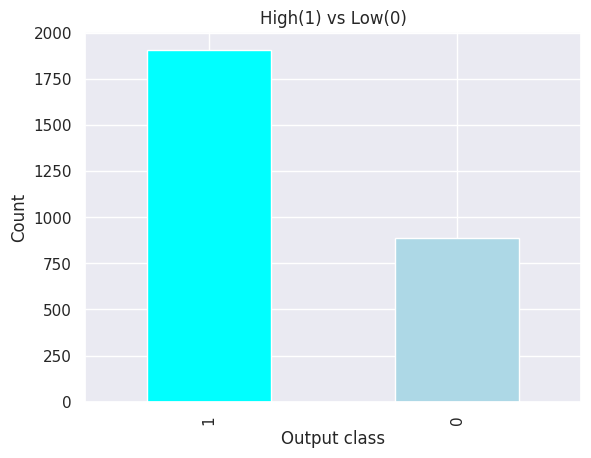

In [ ]:
train_dataset.Price_Range.value_counts().plot.bar(color=['cyan', 'lightblue'],title="High(1) vs Low(0)", xlabel="Output class", ylabel = "Count")

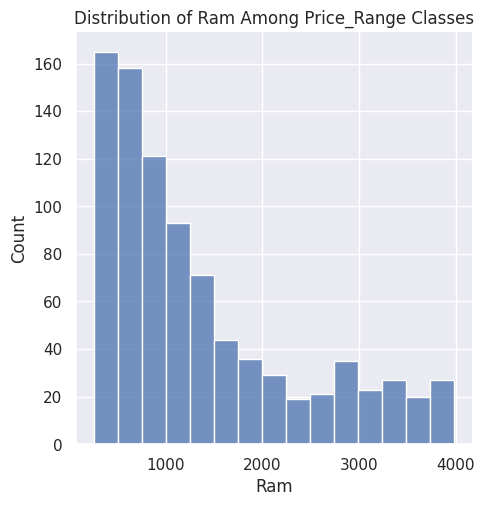

In [ ]:
temp = train_dataset.query('Price_Range == 0')
sns.set_theme()
sns.displot(data=temp.Ram).set(title="Distribution of Ram Among Price_Range Classes", xlabel="Ram")

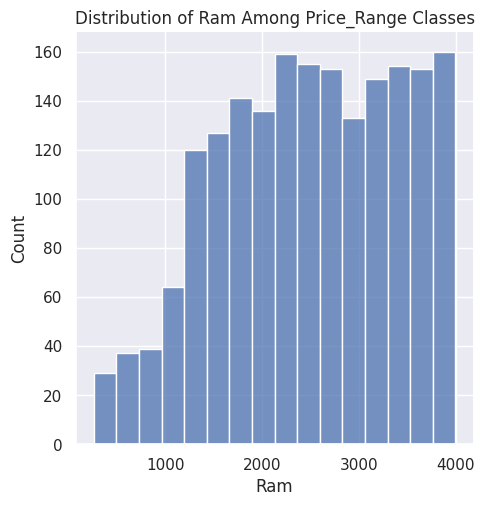

In [ ]:
temp = train_dataset.query('Price_Range == 1')
sns.set_theme()
sns.displot(data=temp.Ram).set(title="Distribution of Ram Among Price_Range Classes", xlabel="Ram")

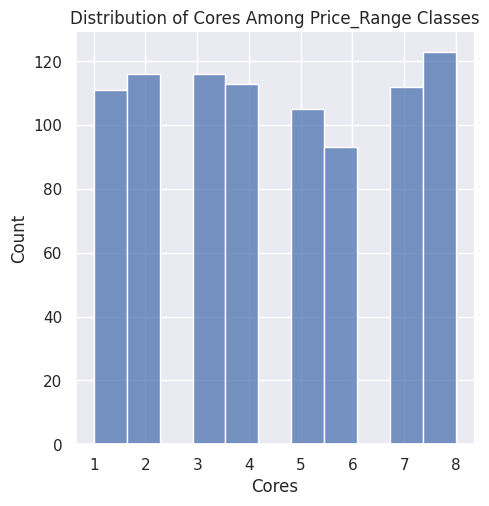

In [ ]:
temp = train_dataset.query('Price_Range == 0')
sns.set_theme()
sns.displot(data=temp.Cores).set(title="Distribution of Cores Among Price_Range Classes", xlabel="Cores")

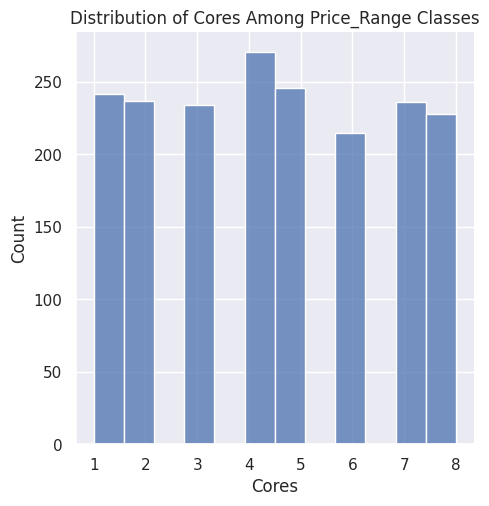

In [ ]:
temp = train_dataset.query('Price_Range == 1')
sns.set_theme()
sns.displot(data=temp.Cores).set(title="Distribution of Cores Among Price_Range Classes", xlabel="Cores")

In [ ]:
train_dataset

,Battery_Power,Clock_Speed,FC,Int_Memory,Mobile_D,Mobile_W,Cores,PC,Pixel_H,Pixel_W,...,Screen_H,Screen_W,Talk_Time,Four_G,Three_G,Touch_Screen,Dual_SIM,Bluetooth,WiFi,Price_Range
0,842,2.2,1,7,0.6,188,2,2,20,756,...,9,7,19,0,0,0,0,0,1,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,...,17,3,7,1,1,1,1,1,0,1
2,563,0.5,2,41,0.9,145,5,6,1263,1716,...,11,2,9,1,1,1,1,1,0,1
3,615,2.5,0,10,0.8,131,6,9,1216,1786,...,16,8,11,0,1,0,0,1,0,1
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,...,8,2,15,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2793,986,2.2,5,38,0.3,95,7,9,5,1359,...,15,13,12,1,1,1,1,1,0,1
2794,848,1.1,7,39,0.4,107,4,16,1768,1812,...,18,4,16,1,1,0,1,0,0,0
2795,1146,0.5,4,21,0.5,152,7,6,841,994,...,15,2,19,1,1,0,1,0,0,0
2796,841,0.5,0,59,0.2,103,6,16,258,1642,...,8,6,10,0,0,0,0,1,0,1


In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2798 entries, 0 to 2797
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  2798 non-null   int64  
 1   Clock_Speed    2798 non-null   float64
 2   FC             2798 non-null   int64  
 3   Int_Memory     2798 non-null   int64  
 4   Mobile_D       2798 non-null   float64
 5   Mobile_W       2798 non-null   int64  
 6   Cores          2798 non-null   int64  
 7   PC             2798 non-null   int64  
 8   Pixel_H        2798 non-null   int64  
 9   Pixel_W        2798 non-null   int64  
 10  Ram            2798 non-null   int64  
 11  Screen_H       2798 non-null   int64  
 12  Screen_W       2798 non-null   int64  
 13  Talk_Time      2798 non-null   int64  
 14  Four_G         2798 non-null   int64  
 15  Three_G        2798 non-null   int64  
 16  Touch_Screen   2798 non-null   int64  
 17  Dual_SIM       2798 non-null   int64  
 18  Bluetoot

In [ ]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Battery_Power  401 non-null    int64  
 1   Clock_Speed    401 non-null    float64
 2   FC             401 non-null    int64  
 3   Int_Memory     401 non-null    int64  
 4   Mobile_D       401 non-null    float64
 5   Mobile_W       401 non-null    int64  
 6   Cores          401 non-null    int64  
 7   PC             401 non-null    int64  
 8   Pixel_H        401 non-null    int64  
 9   Pixel_W        401 non-null    int64  
 10  Ram            401 non-null    int64  
 11  Screen_H       401 non-null    int64  
 12  Screen_W       401 non-null    int64  
 13  Talk_Time      401 non-null    int64  
 14  Four_G         401 non-null    int64  
 15  Three_G        401 non-null    int64  
 16  Touch_Screen   401 non-null    int64  
 17  Dual_SIM       401 non-null    int64  
 18  Bluetooth 

In [ ]:
X_train = train_dataset.iloc[:,:20].values
y_train = train_dataset.iloc[:,20].values

In [ ]:
label_dataset = pd.read_csv('/content/drive/MyDrive/AiDataset/pricek1.csv')

In [ ]:
X_test = test_dataset.iloc[:, :].values
y_test = label_dataset.iloc[:, 0].values

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2798, 20)
(2798,)
(401, 20)
(401,)


LogisticRegression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy score:  0.5286783042394015
F1 score:  0.6257425742574257
Precision score:  0.5249169435215947
Recall score:  0.7745098039215687


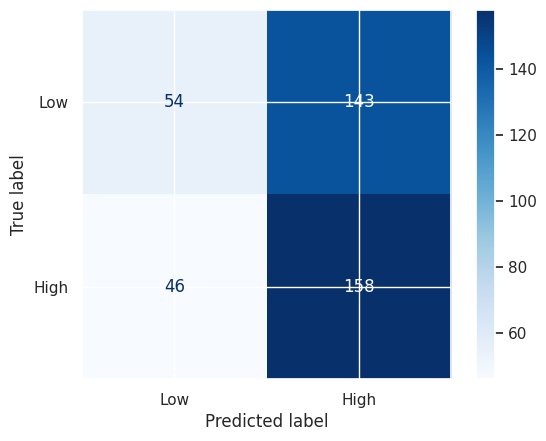

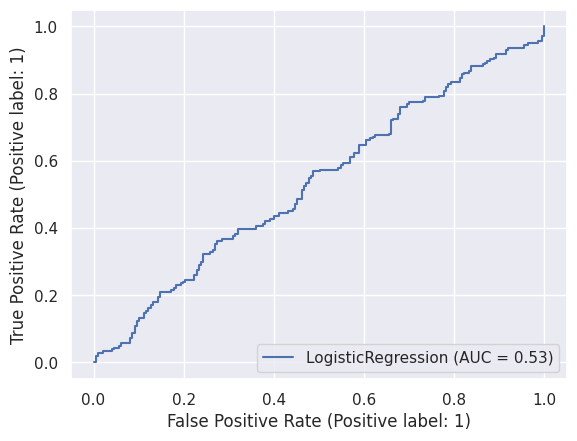

In [ ]:
clf = LogisticRegression(random_state = 0,C=2,penalty= 'l2').fit(X_train, y_train)
Y_pred = clf.predict(X_test)
clf.predict_proba(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low','High'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

SVM


Accuracy score:  0.6458852867830424
F1 score:  0.7125506072874495
Precision score:  0.6068965517241379
Recall score:  0.8627450980392157


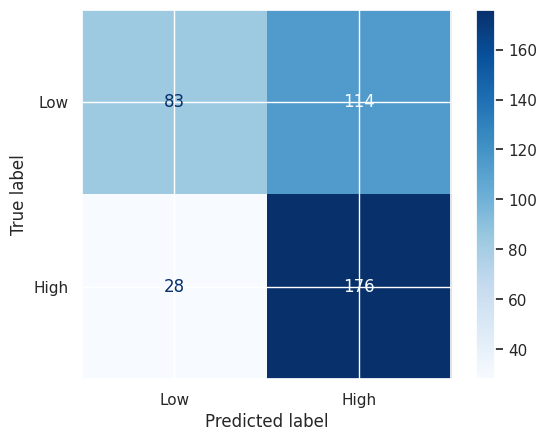

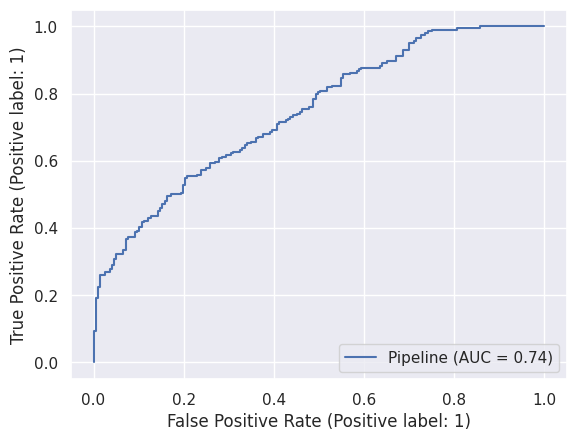

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(kernel = 'linear',C = 0.1))
clf.fit(X_train, y_train)
Y_pred= clf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low','High'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)

GaussianNB

Accuracy score:  0.6658354114713217
F1 score:  0.7254098360655737
Precision score:  0.6232394366197183
Recall score:  0.8676470588235294


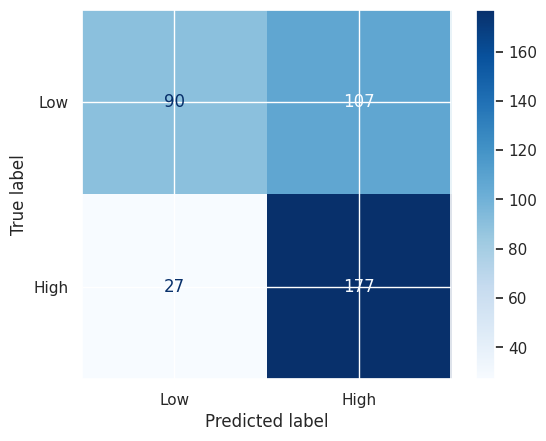

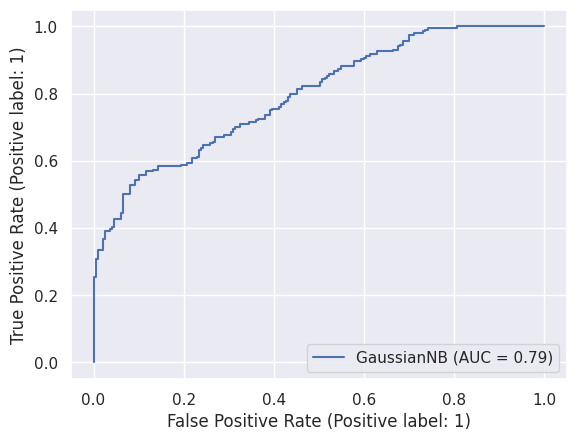

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
Y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low','High'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

BernoulliNB

Accuracy score:  0.5586034912718204
F1 score:  0.6974358974358975
Precision score:  0.5354330708661418
Recall score:  1.0


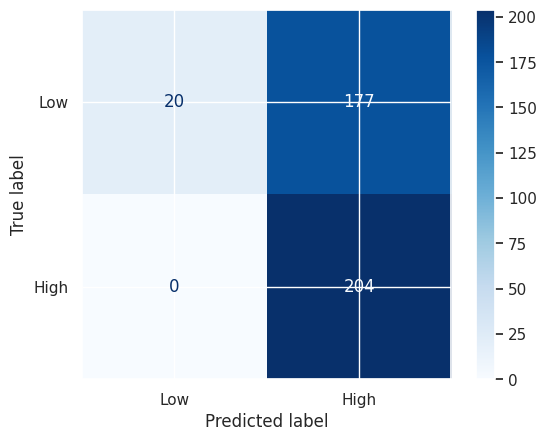

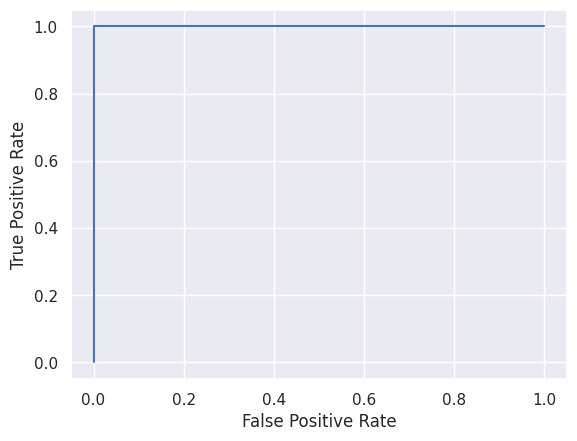

In [ ]:
nb_classifier = BernoulliNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low', 'High'])
cmd.plot(cmap=plt.cm.Blues)

# Calculate and display various performance metrics
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, nb_classifier.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.show()

KNeighborsClassifier

Accuracy score:  0.5211970074812967
F1 score:  0.6129032258064517
Precision score:  0.5205479452054794
Recall score:  0.7450980392156863


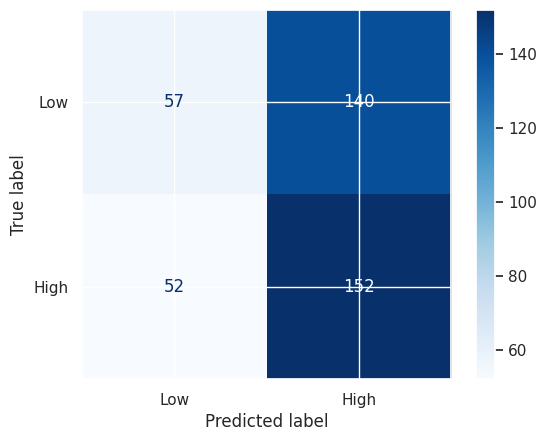

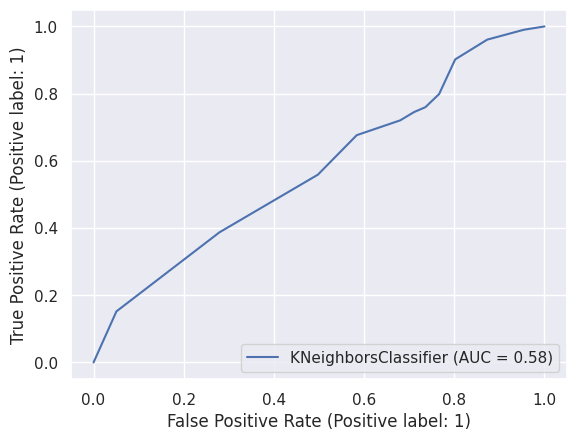

In [ ]:
neigh = KNeighborsClassifier(leaf_size = 1, n_neighbors = 11,p = 1)
neigh.fit(X_train, y_train)
Y_pred = neigh.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low','High'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(neigh, X_test, y_test)

RandomForestClassifier

Accuracy score:  0.5760598503740648
F1 score:  0.6718146718146718
Precision score:  0.554140127388535
Recall score:  0.8529411764705882


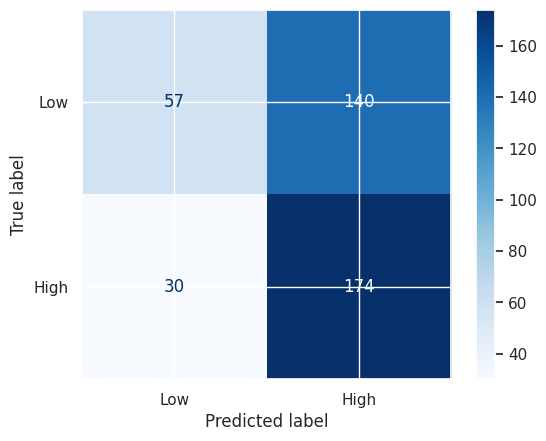

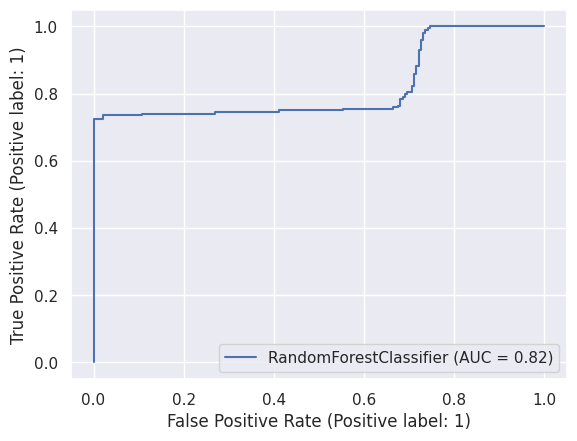

In [ ]:
rf = RandomForestClassifier(max_depth = 4,random_state = 0)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low','High'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(rf, X_test, y_test)

DecisionTreeClassifier

Accuracy score:  0.5411471321695761
F1 score:  0.6244897959183674
Precision score:  0.534965034965035
Recall score:  0.75


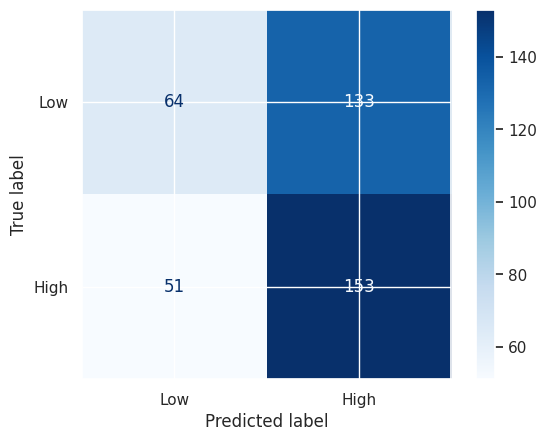

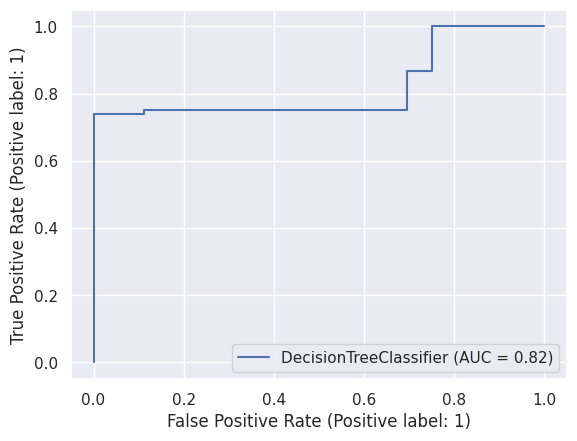

In [ ]:
dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
dt.fit(X_train, y_train)
Y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low','High'])
cmd.plot(cmap=plt.cm.Blues)
print('Accuracy score: ', accuracy_score(y_test, Y_pred))
print('F1 score: ', f1_score(y_test, Y_pred))
print('Precision score: ', precision_score(y_test, Y_pred))
print('Recall score: ', recall_score(y_test, Y_pred))
from sklearn.metrics import RocCurveDisplay
rfc_disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)

GradientBoostingClassifier

Accuracy score:  0.6109725685785536
F1 score:  0.6867469879518072
Precision score:  0.5816326530612245
Recall score:  0.8382352941176471


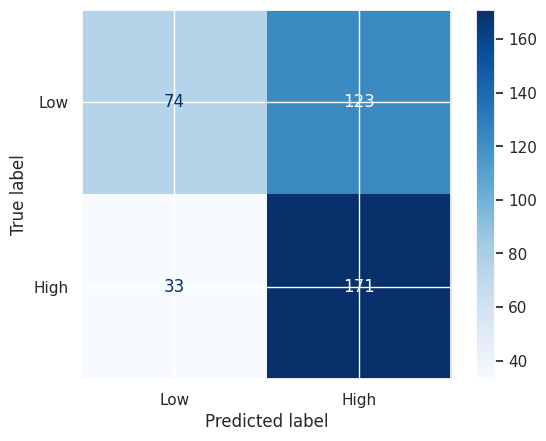

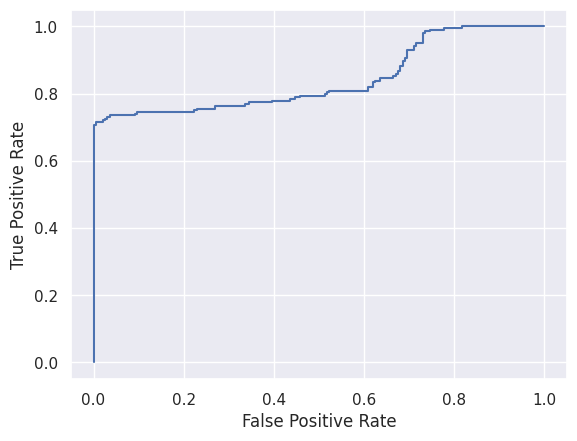

In [ ]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low', 'High'])
cmd.plot(cmap=plt.cm.Blues)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, gb_classifier.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.show()

ExtraTreeClassifier

Accuracy score:  0.8154613466334164
F1 score:  0.8391304347826087
Precision score:  0.75390625
Recall score:  0.946078431372549


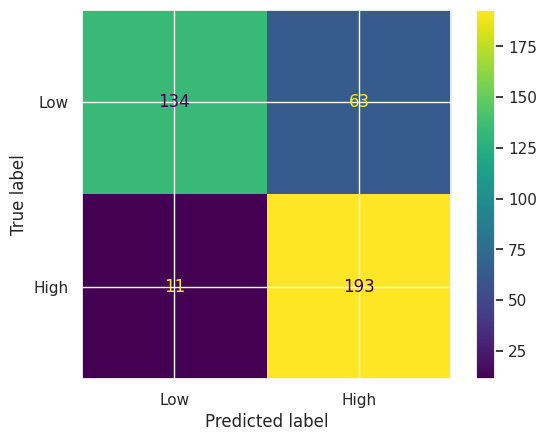

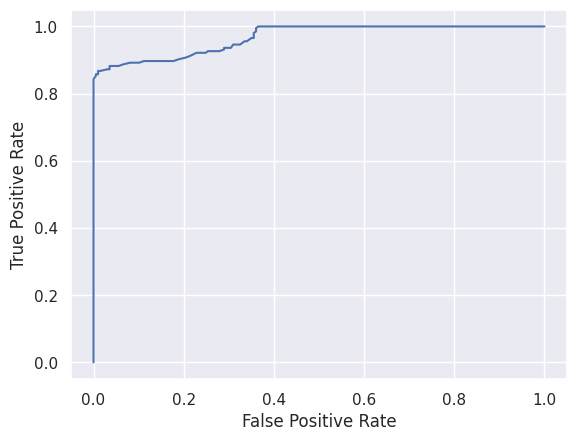

In [ ]:
pipe = make_pipeline(StandardScaler(), ExtraTreesClassifier(random_state=42))

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low', 'High'])
cmd.plot()

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, pipe.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.show()

Linear Discriminant Analysis (LDA)

Accuracy score:  0.6982543640897756
F1 score:  0.7515400410677618
Precision score:  0.6466431095406361
Recall score:  0.8970588235294118


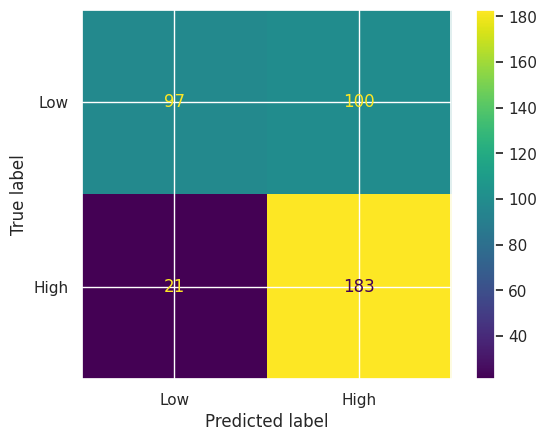

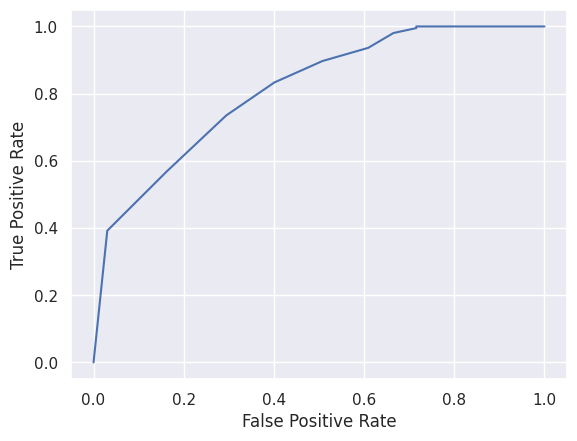

In [ ]:
lda_knn_clf = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=1), KNeighborsClassifier(n_neighbors=9))

lda_knn_clf.fit(X_train, y_train)

y_pred = lda_knn_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low', 'High'])
cmd.plot()

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))

fpr, tpr, _ = roc_curve(y_test, lda_knn_clf.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.show()

Bagging Classifier

Accuracy score:  0.800498753117207
F1 score:  0.8237885462555066
Precision score:  0.748
Recall score:  0.9166666666666666


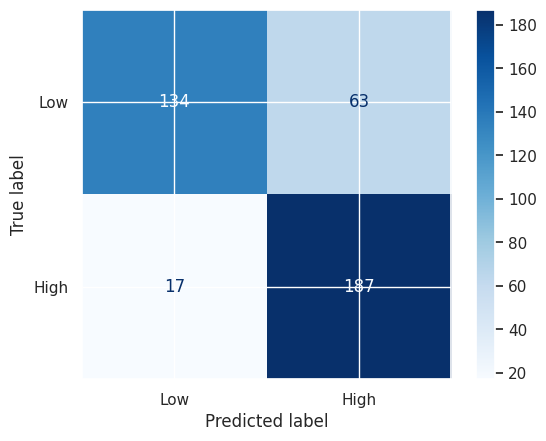

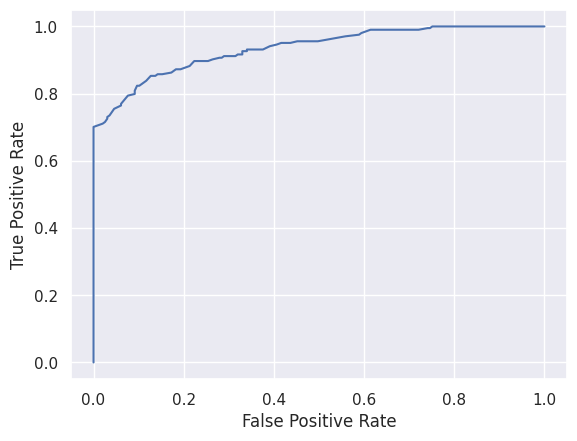

In [ ]:
bagging_classifier = BaggingClassifier(n_estimators=100, random_state=42)
bagging_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_classifier.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low', 'High'])
cmd.plot(cmap=plt.cm.Blues)

# Calculate and display various performance metrics
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, bagging_classifier.predict_proba(X_test)[:, 1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.show()

RidgeClassifier

Accuracy score:  0.6882793017456359
F1 score:  0.7412008281573499
Precision score:  0.6415770609318996
Recall score:  0.8774509803921569


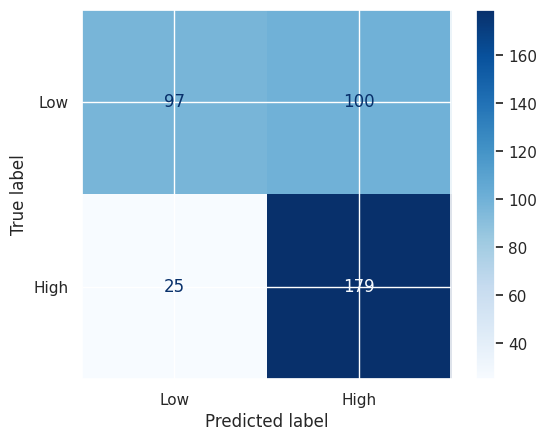

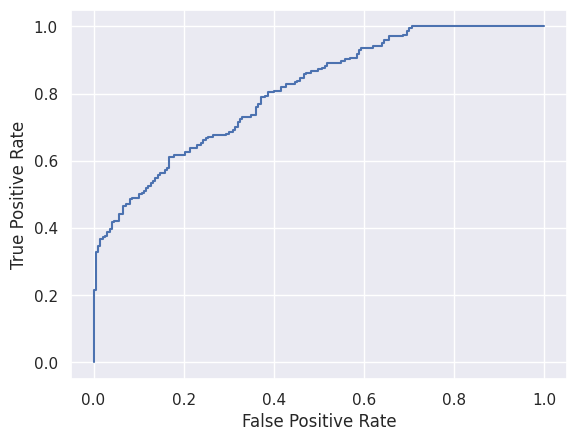

In [ ]:
ridge_classifier = RidgeClassifier(alpha=1.0, random_state=42)
ridge_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = ridge_classifier.predict(X_test)

# Calculate and display confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Low', 'High'])
cmd.plot(cmap=plt.cm.Blues)

# Calculate and display various performance metrics
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 score: ', f1_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred))
print('Recall score: ', recall_score(y_test, y_pred))

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, ridge_classifier.decision_function(X_test))
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
roc_display.plot()

plt.show()